In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
# Data Generate X,Y 
def generateDataset(m):
    X = np.random.randn(m)*10
    noise = np.random.randn(m)
    y = 3*X + 1 + 5*noise
    return X,y

In [3]:
X,y = generateDataset(100)
print(X.shape,y.shape)

(100,) (100,)


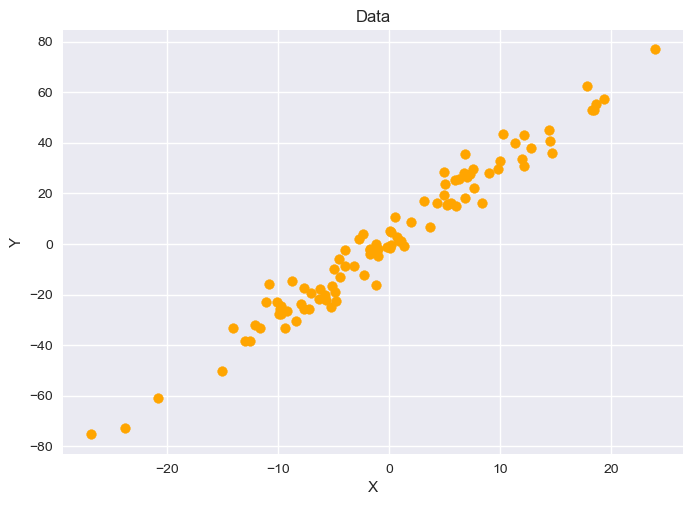

In [4]:
def plotData(X,y,color="orange",title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X,y,c=color)
    plt.show()

plotData(X,y)

In [5]:
def normaliseData(X):
    X = (X-X.mean())/X.std()
    return X

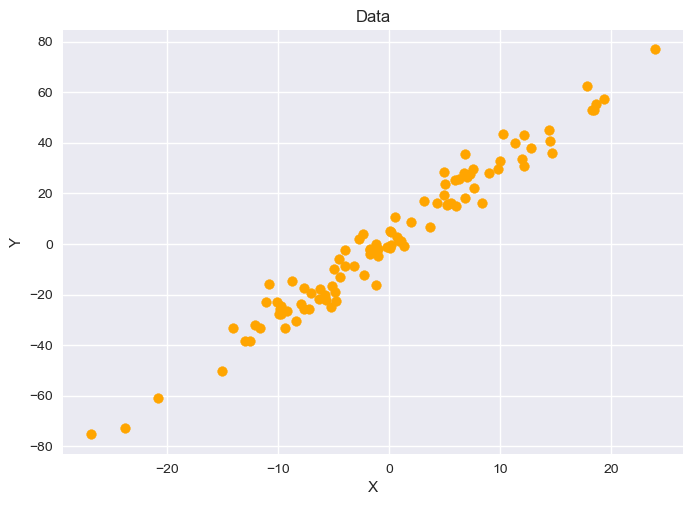

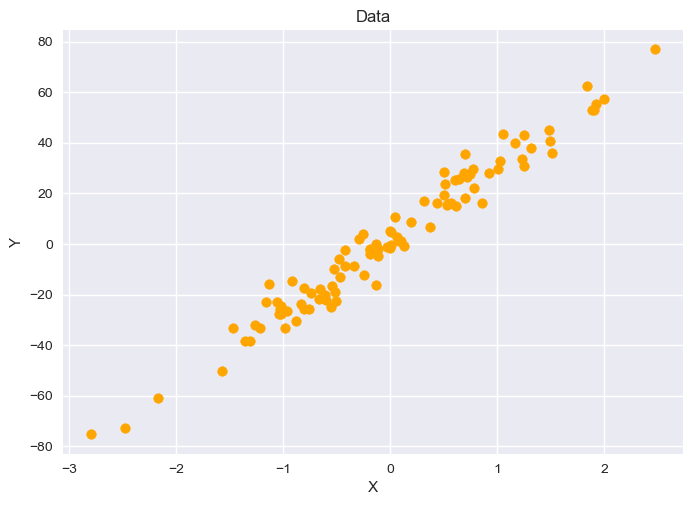

In [6]:
plotData(X,y)
X = normaliseData(X)
plotData(X,y)

In [7]:
from sklearn.model_selection import train_test_split
XT, Xt, yT, yt = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


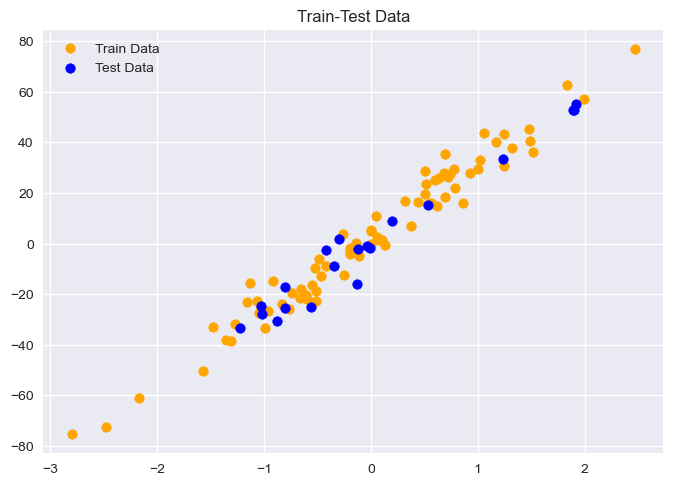

In [9]:
plt.scatter(XT,yT,color='orange',label="Train Data")
plt.scatter(Xt,yt,color='blue',label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [10]:
def hypothesis(X,theta):
    return theta[0] + theta[1]*X 

def error(X,y,theta):
    m = X.shape[0]
    e = 0 
    for i in range(m):
        y_i = hypothesis(X[i],theta)
        e = e + (y[i] - y_i)**2 
    
    return e/(2*m)

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i],theta) - y[i]
        grad[0] += (exp) 
        grad[1] += (exp)*X[i]

    return grad/m 


def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta

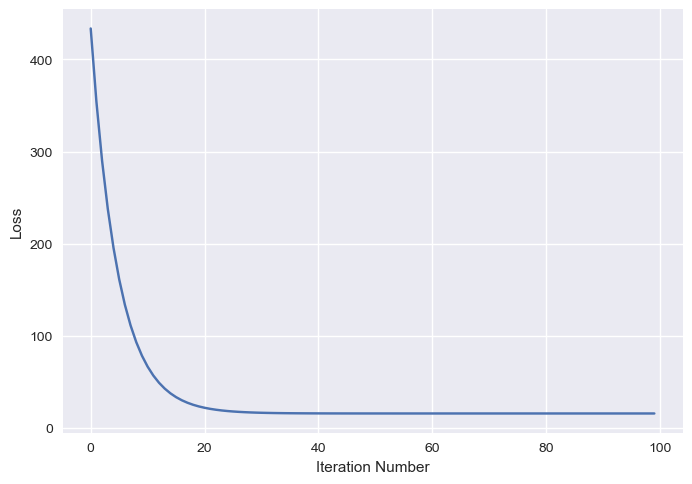

In [11]:
theta = train(X,y)

In [12]:
theta

array([ 2.11625534, 28.84662557])

In [13]:
def predict(X,theta):
    return hypothesis(X,theta)

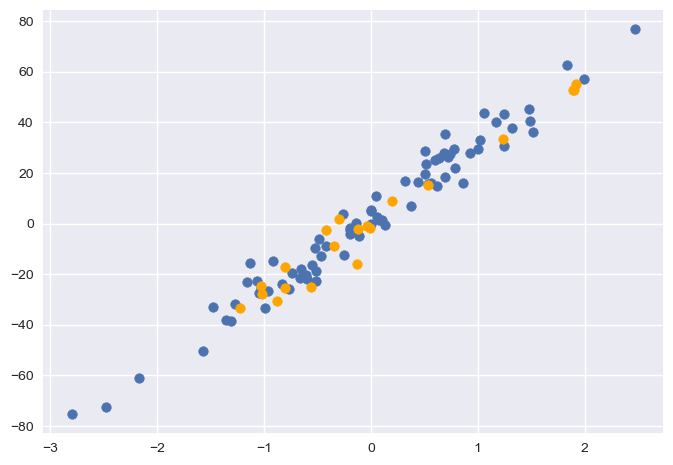

In [14]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color='orange')
plt.show()

In [15]:
yp = predict(Xt,theta)

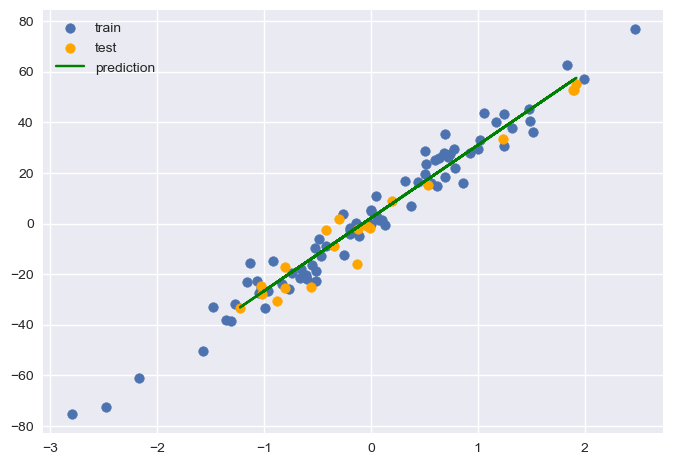

In [16]:
plt.scatter(XT,yT,label="train")
plt.scatter(Xt,yt,color='orange',label="test")
plt.plot(Xt,yp,color='green',label="prediction")
plt.legend()
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAqEAAAHRCAYAAABaaGACAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAABPdklEQVR4nO3de3iU9Z3//9dMMslMBiYnAioEBQkHMbaWWFRo3RVjWxR1Paxey6K4WFfBY69qtwfbri1id7/+tpcKWr8LS9eibsu3fj2BhirfHqgo0AoROYMcCkLOIZOZZE6/P9IJmWRmck8yM5l78nxclxcX99y570/8EHz5Obw/llAoFBIAAACQRtahbgAAAACGH0IoAAAA0o4QCgAAgLQjhAIAACDtCKEAAABIO0IoAAAA0o4QCgAAgLQjhAIAACDtCKEAAABIu9yhbkAi6upOR71utVpUUuJUY6NbwSAHQGUy+so86CvzoK/Mg74yD/pq4MrKRhq6LytGQq1WiywWi6xWy1A3Bf2gr8yDvjIP+so86CvzoK9SLytCKAAAAMyFEAoAAIC0I4QCAAAg7QihAAAASDtCKAAAANIu6SF0586dmj9/vqqqqjR79mz9+Mc/VmdnpyRp+/btuuWWW3TxxRfryiuv1K9+9atkvx4AAAAmkNQQGgwG9c///M/6yle+og8//FBr167VH/7wB/3v//2/1dLSorvvvls33HCDtmzZoqVLl2rZsmXasWNHMpsAAAAAE0hqCG1paVFdXZ2CwaBCoa7CrlarVQ6HQzU1NSoqKtL8+fOVm5uryy67TPPmzdOaNWuS2QQAAACYQFJPTCouLtbChQv1k5/8RP/2b/+mQCCgOXPmaOHChXryySc1efLkiPsnTZqktWvXGn6+1Rq9aGxOjjXiV2Qu+so86CvzoK/Mg74yD/oq9ZIaQoPBoOx2ux577DHdfPPNOnz4sO677z49/fTTcrvdcjgcEffb7Xa1t7cbfn5JiVMWS+yTC1wuR8zPkFnoK/Ogr8yDvjIP+so86KvUSWoI3bBhg9555x29/fbbkqSKigotWbJES5cu1bx583T6dOTZ716vV06n0/DzGxvdMUdCXS6HWls9CgSCg/smkFL0lXnQV+ZBX5kHfWUe9NXAFRcby3ZJDaEnTpzo3gnf/YLcXNlsNk2ePFmbNm2K+Gz//v2qqKgw/PxgMKRgMBTz80AgKL+fPyhmQF+ZB31lHvSVedBX5kFfpU5SFzrMnj1bdXV1ev755xUIBHT06FE999xzmjdvnqqrq1VfX6/Vq1fL5/Np8+bNeuONN3TTTTclswkAAACQ1NDi0Svv7tXKtz7RK+/uVUOLZ6ibFMESCm9jT5I//vGP+ulPf6qDBw9q5MiRuu6667RkyRLl5eWptrZWS5cu1d69e1VSUqLFixfrxhtvNPzsurrTUa/n5lpVXOxUU5Ob/1vJcPSVedBX5kFfmQd9ZR5m7qtAMKjV63ar9mCDWtt93dddBTZVTizVwrlTlWNN3YarsrKRhu5L6nS8JF1++eW6/PLLo35WWVmpV155JdmvBAAAwF+tXrdbmz7+rM/11nZf13WLRYuumTYELYtE3QEAAIAs0dDiUe3Bhrj31B6sz4ipeUIoAABAltiw9WjEFHw0rW6fNmw9lqYWxUYIBQAAyBJur9/Qfe3e+EE1HQihAAAAWcJpN7bdp8BuS3FL+kcIBQAAyBLVVeVyFcQPmC6nTdVV49LUotgIoQAAAFmitNChyomlce+pnFCq0sKhP4406SWaAAAAMHQWzp0qWSyqPVivVnePOqFOmyondNUJzQSEUAAAgCySY7Vq0TXT1NDi0YatR9Xu9ctpt6n6knKVuOxD3bxuhFAAAIAsVFro0G1zJg91M2JiTSgAAADSjhAKAACAtCOEAgAAIO0IoQAAAEg7QigAAADSjhAKAACAtCOEAgAAIO0IoQAAAEg7QigAAADSjhAKAACAtCOEAgAAIO0IoQAAAEg7QigAAADSjhAKAACAtCOEAgAAIO0IoQAAAEg7QigAAADSjhAKAACAtCOEAgAAIO0IoQAAAEg7QigAAADSjhAKAACAtCOEAgAAIO0IoQAAAEi73KFuAAAAQDI0tHi0YetRub1+Oe25qq4qV2mhY6ibhRgIoQAAwNQCwaBWr9ut2oMNam33dV/fvPOkKieWauHcqcqxMvmbaQihAADA1Fav261NH3/W53pru6/rusWiRddMG4KWIR7+twAAAJhWQ4tHtQcb4t5Te7BeDS2eNLUIRhFCAQCAaW3YejRiCj6aVrdPG7YeS1OLYBQhFAAAmJbb6zd0X7s3flBF+hFCAQCAaTntxra3FNhtKW4JEpX0ENrc3KxHH31UM2fO1CWXXKLFixfr1KlTkqTt27frlltu0cUXX6wrr7xSv/rVr5L9egAAMIxUV5XLVRA/YLqcNlVXjUtTi2BU0kPo/fffr/b2dm3YsEEbN25UTk6OHnvsMbW0tOjuu+/WDTfcoC1btmjp0qVatmyZduzYkewmAACAYaK00KHKiaVx76mcUEq90AyU1BJNH3/8sbZv364//vGPGjFihCTpRz/6kerq6lRTU6OioiLNnz9fknTZZZdp3rx5WrNmjS666KJkNgMAAAwjC+dOlSwW1R6sV6v7zNpPl9OmyglddUKReZIaQnfs2KFJkybpl7/8pV5++WV5PB596Utf0re+9S3t27dPkydPjrh/0qRJWrt2bTKbAAAAhpkcq1WLrpnWfWJSu9cvp92m6kvKVeKyD3XzEENSQ2hLS4v27NmjCy+8UK+++qq8Xq8effRRfetb39KoUaPkcEQOhdvtdrW3txt+vtVqkdVq6XM9J8ca8SsyF31lHvSVedBX5kFfpdaYUqf+8SvJGfWkr1IvqSE0Ly9PkvTd735X+fn5GjFihB566CH9/d//vW688UZ5vd6I+71er5xOp+Hnl5Q4ZbH0DaFhLhfrPcyCvjIP+so86CvzoK/Mg75KnaSG0EmTJikYDMrn8yk/P1+SFAwGJUnTpk3TSy+9FHH//v37VVFRYfj5jY3umCOhLpdDra0eBQLBQXwHSDX6yjzoK/Ogr8yDvjIP+mrgiouNDTAmNYRefvnlKi8v13e+8x0tW7ZMHR0d+o//+A9dddVVuvbaa/X0009r9erVmj9/vrZt26Y33nhDK1asMPz8YDCkYDAU8/NAICi/nz8oZkBfmQd9ZR70lXnQV5krvK7U0xFQSZFDf/O5s1XozB/qZmUlSygUip3qBuDkyZN68skntWXLFnV0dOjKK6/Ud7/7XblcLtXW1mrp0qXau3evSkpKtHjxYt14442Gn11Xdzrq9dxcq4qLnWpqcvNDneHoK/Ogr8yDvjIP+ipzBYJBrV63W7UHGyKOAe25wz7HyvpQI8rKRhq6L+khNJUIoeZHX5kHfWUe9JV50FeZa+Wbn2jTx5/F/HxW5dladM20NLbIvIyGUCI9AAAY1hpaPKo92BD3ntqD9Wpo8aSpRcMDIRQAAAxrG7YejZiCj6bV7dOGrcfS1KLhIakbkwAAADKZ1XNMjiPLZfE1K2Qrkmf8Erm9fkNf2+6NH1SRGEIoAADIfkG/Ruy6X/l1NbL66rov20/8UtflzdT7ulNB5cR9RIHdlupWDitMxwMAgKw3Ytf9sh9/KSKASpLVV6dpeksPn/9c3K93OW2qrhqXyiYOO4RQAACQ1ayeY8qvq5FF0QsCWRRSletPKrXVRf1ckionlKq0kNOTkokQCgAAsprjyPI+I6C9jbA26t7p78nljJxydzltmnXhWVo4Nzln0uMM1oQCAICsZvE1G7rvonFWPXZZVfeJSaXFBbriorM4MSlFCKEAACDLxd9wFBayFau00KHb5kzmYIE0IIQCAIDsFPRrxM4lyj/5635vDdhGyzN+cRoahTBCKAAAyEojdt0v+2cvy9LPfSFZ1FlWraCD3e/pxMYkAACQdbp2xK83EEAl7+jr1TbtmXQ0Cz0QQgEAQNbp2hHf2O99Fkkh+zjJyuRwuhFCAQBA1jG6I77r3qbUNQQxEUIBAEDWCdmKEri3OHUNQUyEUAAAkHU845coaCvt975ATgm74ocIIRQAAGSdoGOcOsq+GuOgzi4hSZ1jvsau+CHCKlwAAJCV2qY9I4VCyv/s17KGvBGfBS12dZz1d+yKH0KEUAAAkJ2suWq78Hm1n/89FRz8iXKbP5Askt91qdrP/5aCjrFD3cJhjRAKAACyWtAxTm3TGfHMNKwJBQAAQNoRQgEAAJB2hFAAAACkHSEUAAAAaUcIBQAAQNoRQgEAAJB2hFAAAACkHXVCAQBAQhpaPNqw9ajcXr+c9lxVV5WrtNAx1M2CyRBCAQCAIYFgUKvX7VbtwQa1tvu6r2/eeVKVE0u1cO5U5ViZZIUxhFAAAGDI6nW7tenjz/pcb233dV23WLTommlD0DKYEf+7AgAA+tXQ4lHtwYa499QerFdDiydNLYLZMRIKAMAQMsv6yg1bj0ZMwUfT6vZpw9Zjum1ORZpaBTMjhAIAMARStb4yVaHW7fUbuq/dGz+oAmGEUAAAhkCy11emetOQ024sMhTYbQN+B4YX1oQCAJBmqVhfGQ61vafMw6F29fo9A2prWHVVuVwF8QOmy2lTddW4Qb0HwwchFACANHv7A+PrK41Ix6ah0kKHKieWxr2nckJpRq5nRWYihAIAkGZG100avS+RTUODsXDuVM2qPFsuZ+SIqMtp06wLz9LCuVMH9XwML6wJBQAgzYyumzR6X7o2DeVYrVp0zbTuzU/tXr+cdpuqLylXics+qGdj+CGEAgCQZl+dWa73Pz4Rd/QykfWV6d40VFro0G1zJiflWRi+CKEAAKRZeH1ltN3xYYmsr6yuKtfmnSeTFmqNMEt9U2QuQigAAENg4dypksWi2oP1anWfCY8up02VE0pjrq+MFf6SGWrj4fx4JEtKQmggENDChQs1duxYPfnkk5Kk7du368c//rH279+v4uJi3XvvvbrllltS8XoAADJeousr+wt/C746eUChNlGcH49kSUkIffbZZ7V161aNHTtWktTS0qK7775bDzzwgG699VZt2bJFS5Ys0ZQpU3TRRRelogkAAJiC0fWVRsNfKjcNJVIKiql59CfpIfT9999XTU2Nrr766u5rNTU1Kioq0vz58yVJl112mebNm6c1a9YQQgEA6Eei4S9Vm4Y4Px7JlNQQ2tDQoO9+97tasWKFVq9e3X193759mjw58gdi0qRJWrt2bULPt1otslotfa7n5FgjfkXmoq/Mg74yD/rKPAbaV7/Z9hdD4e/dP/1F/1Cdul3rno6Awfv8ys01959Hfq5SL2khNBgM6pFHHtGdd96pqVMj15243W45HJHD8na7Xe3t7Qm9o6TEKYulbwgNc7kY+jcL+so86CvzoK/MI9G+8odCxu4LSsXFzoE0yZCSImPtLi0uSGk70omfq9RJWgj92c9+pry8PC1YsKDPZw6HQ6dPn4645vV65XQm9ge0sdEdcyTU5XKotdWjQCCYWMORVvSVedBX5kFfmcdA+yo3zgBMxH1WqanJHfeehhaP3v7gqNq9PhXYbfrqTOOllf7mc2dr47ajERufenM5bbriorP6bUem4+dq4Iz+D0jSQuhrr72mU6dOqaqqSlJXyJSk3/zmN3r00Ue1adOmiPv379+viorE1osEgyEFg7H/bzAQCMrv5w+KGdBX5kFfmQd9ZR6J9tVVM8YaKm4/5wtjYz431u769z8+Ybi0UqEzX5UT+i8FVejMz5o/i/xcpU7SFjq8/fbb+tOf/qStW7dq69atuvbaa3Xttddq69atqq6uVn19vVavXi2fz6fNmzfrjTfe0E033ZSs1wMAkLXCdUDj6a8OaHh3fe8gG95dv3r9HkNt4fx4JEtaitUXFxdr1apVWrp0qZ5++mmVlJToe9/7ni699NJ0vB4AANMbaHF7KbmllTg/HsliCYUMrnbOAHV1p6Nez821qrjYqaYmN0PmGY6+Mg/6yjzoK/NIRl8NJPy98u5e1Ww51u+zr76kfECllbLxCE9+rgaurGykofs4thMAABMZSB1Qt9dv6L52b/wyUL1xhCcGgxAKAMh62ThSlwin3dh/7gvstv5v6oEjPDEYhFAAQNZipK5LdVW5Nu882e/u+uqqcYafyRGeGKzs/8kDAAxbydoRbnbJ2F3fWyJHeALRMBIKAMhKjNRFGszu+mhStc4UwwchFACQlRIZqRvIjnCzSXZppVStM8XwQQgFAGSl4ThSZ/Uck+PIcll8zQrZiuQZv0RBR+Q6z4Hsro8mFetMMbwQQgEAWSlTR+rqmtr1PzV71ebpTN5O/aBfI3bdr/y6Gll9dd2X7Sd+qY6yq9U27RnJmtz/5IfXmfZ3hOdwWOqAgSGEAgCyUqaN1AWCQa16fZc+Ptio5raO7uvJ2Kk/Ytf9sh9/SRZFnj9j9dXJfvwlSRa1TV8xmOZHlex1phheCKEAgKyUaSN1qaqpafUcU35dTZ8AGmZRSHl1NbJ6jvWZmh8sjvDEYBBCAQBZK1NG6lK5U99xZHnEFHw0Ob5TchxZIfeUJxJ6tlHJWmeK4YUQCgDIWpkyUpfKnfoWX7PB+5oSei6QaoRQAEDWG+qRulTu1A/ZigzeV5zws4FU4sQkAABSLJU79T3jlyhoK4t7T8A2Wp7xixN+NpBKhFAAAFKsuqpcroL4AXOgO/WDjnHqKLtaIVmifx6yaKf3Evnyz0n42UAqEUIBAEixVJzd3lPbtGdUG5irps6iiOtNnUV6t+Fv9dhH/6TV6/cM6NlAqrAmFAAAqXvzktvrT14R+R6um32ePv2sVaeavfL5g93Xk7FTv+G0Tz/Zu1g23w26fswbGpHTptP+EXrt1HVq9I2SNPDd90CqEEIBAMNaIBjU6nW7VXuwIWIHezKKyMd7vi3HorIihx685XMqKxpcMDyz+75Mq479U9R7Brr7HkgVQigAIOOkelSyp1QVke/v+b5ASMcb2vX6pk8H9XwptbvvgVQhhAIAMkaqRyV7S2UR+XQ8PyyVu++BVCGEAgAyRipGJeONqiaziHy096SySH1P1VXl2rzzZNx3DXT3PZAqhFAAQEZI9qhhf6Oq180+T7WHGg21Ld40drz32PNyBv18I8K776MF+LDB7L4HUoEQCgDICMkeNexvVPXDXSflC4QMtS3eNHa89/T3/Rh5vlEL506VLBbVHqxXq/vMe5Ox+x5IBUIoACAjJHNzjZFRVaMBNN40tpH3WCTFe1OypslzrFYtumZa97KAdq9fTrtN1ZeUq8RlH/TzgWQjhAIAMkIyN9cYGVU1Kt40tpH39Bd1kz1NXlro0G1zJifteUCqcGISACAjJONoy4YWj155d6/+vK9+0O1xOW2adeFZcaexjY7elhU55HJGfm9Gng9kM0ZCAQAZYTCba2JtDhqoc0oL9I1bP9/vNLbR0duLK0apumqcfrPtLwqEpFyrdNWMcUyTY1gjhAIAMkaim2vC6x//vK9edc3epLXjwomlhgJiIqWRSgsdmn/1ZBUXO9XU5Ja/x9GdwHBECAUAZAyjm2uSPfLZUyIbhSiNBAwcIRQAkHH621wTqyxSMiQaGimNBAwMIRQAYCpGyiIN1OhiR8KhkdJIwMAQQgEAGSnWcZsDLb9ksUihOPWScizSI7d9fsBn01MaCUgMIRQAkFH6O24z1G/lzb5cTpsmjS3Sn/bWxbxn5vQxrN0E0og6oQCAjBJe79l7tDN83Oann51O+JmVE0p17w3TNavybI10RNbrHOnoqtd559xpg2o3gMQwEgoAyBhG1nuedvvktOfI7Q30+7yem4NYuwlkFkIoACBjGFnvedrj09mlBXJ722PeM7rIrosryqIGzHhrN2OtQwWQfIRQAEDGMHoM5oSzXZp4TmHcskiJbDDqbx1qos8D0D9CKAAgYxg9BnOEw6bb5lQkbWo9Vt3R8DpUWSxadA1rRoFkIoQCADJGIsdgSskpi2RkHWrtwXo1tHiYmgeSiLkFAEDGCB+DGU+yj8E0sg611e3Thq3HkvZOAIyEAgAyTLqPwTS6DrXdm9wz6oHhLukhdPfu3frJT36inTt3ymazadasWfqXf/kXlZSUaPv27frxj3+s/fv3q7i4WPfee69uueWWZDcBAGBiOVarbph9nqwWaf9fWmSxSJPOcem62RNTUkrJ6DrUArut/5sAGJbU6Xiv16u77rpLF198sf7whz/ozTffVHNzs77zne+opaVFd999t2644QZt2bJFS5cu1bJly7Rjx45kNgEAYGKBYFAr3/xEP/r5Vv1+xwmdaGjX8fp2fbS/Qa/+7qACwWDS31ldVS5XQfyA2XMdKoDkSGoIPX78uKZOnaolS5YoLy9PxcXFuvXWW7VlyxbV1NSoqKhI8+fPV25uri677DLNmzdPa9asSWYTAAAm1t9pSavX70n6O4diHSqAJE/HT5w4Uf/5n/8Zce2dd97R9OnTtW/fPk2eHLmDcdKkSVq7dq3h51utFlmtlj7Xc3KsEb8ic9FX5kFfmUe29FVDi0e1h/rfpd7i7kg4EDa0ePT2B0fV7vWpwG7TV2dGFqG/67oLZLVatP1A33WoF50/SouunZaUOqHZ0lfDAX2VeinbmBQKhfTTn/5UGzdu1C9+8Qv993//txyOyL807Ha72ttjn3jRW0mJUxZL3xAa5nLxf6lmQV+ZB31lHmbvq//zu4MRATCaVrdPv93xmRZdd6GhZwYCQT3zq4+0bdcpNbd1dF//4JOTmjFttO6/5fPdIePRO76ouqZ2vfa7A3J7/BpRYNP1X56oUUUFA/+mYjB7Xw0n9FXqpCSEtrW16dvf/rZ27typX/ziF5oyZYocDodOnz4dcZ/X65XT6TT83MZGd8yRUJfLodZWjwKB5K8XQvLQV+ZBX5lHtvRVY7PH0H0NTe1qanIbuveF13fqDztO9Lne3Nahd7ccVWeHX1+/bnr39VxJN3154pkbQyHD7zIiW/pqOKCvBq642Fi2S3oIPXLkiL7+9a/rnHPO0dq1a1VSUiJJmjx5sjZt2hRx7/79+1VRUWH42cFgSMFgKObngUBQfj9/UMyAvjIP+so8zN5Xjvwcg/flGvo+G1o82rG/Pu492w/U62SDO+3rPc3eV8MJfZU6SV3o0NLSojvuuENf+MIXtHLlyu4AKknV1dWqr6/X6tWr5fP5tHnzZr3xxhu66aabktkEAMAQaGjx6JV392rlW5/olXf3qqHF2KhmT8nepU4ReiCzJXUk9Ne//rWOHz+u9evX6+2334747M9//rNWrVqlpUuX6umnn1ZJSYm+973v6dJLL01mEwAAaRQIBrV63W7VHmyICHybd55U5cSuwvKxNvSEz313e/1y2nNVXVWuyomlUc9wD0tklzpF6IHMltQQeuedd+rOO++M+XllZaVeeeWVZL4SADCEwiWVeguXVJLFokXXTIv4LF5wvXBCiS6/cIw+PtQY9bSkebPO0yvv7o0IrrFCaSqK0EcLzpRuAgaGYzsBAAPS0OJR7cH+Syo1tHgiglq84PrHnSc1q/JsPXZ7lTZsPap2r19Wi0WBUFD7jjbrsZUfyOc/szcg3ohrdVW5Nu88GXdK3uj0/mBGfAFEx08MAGBABrLm0mhwlaRb/naSQiHpyKe7NKVpmW4r/DctOGulSm11Z54fp4h9MovQD0URfSDbMRIKABiQgay5TCS4tns8mnH6+7r73G0qyWvp/vyK4t9qW+sMPXt4iYLq2lH/0b5T+q91UjAUipgmXzh3qmSxqPZg3yL0lRO6RjD7M9ARXwDxEUIBAAMykDWXRoNrY6tXf+P/oWaXblSOJbI0X0lei64s3ShJevrwA399bkC/71EPtOc0+aJrpnWv5Wz3+uW021R9SblKXHZDbUkkON82x3jZQWC4I4QCAAZkIGsujQZX3+nDuqh0S58AGpZjCanK9SeV2urU4Cvr83nvjVGlhQ7dNmdylCf1j132QGqwJhQAMCADWXNptBbo3NLXVNxjCj6a4rxmXT/mjbj3hKfJByMVu+wBEEIBAIOwcO5Uzao8Wy5nZABzOW2adeFZfdZcGg2uRXnGjsockdMW9/NkFKNPdhF9AF2YjgcADFiO1Zrwmksjm4VsH4+VTvb//rbAiH7vGew0eTg4J6uIPoAuhFAAwKAlsubSUHCteFBtn/1KIyyNMZ/T1Fmk107O6/d9yZgmT8YuewCRCKEAgCERL7gGHeNkPfurCp54WdYom5OCIYuO5sxSR+45km/wxej7M5ARXwDxEUIBABnJPf1ZWaxW2U69o1z/mQL1/twy+UZfrbOnPaPP+femdZp8MLvsAUQihAIAMpM1V23TV8g68ZgcR5bL4mtWyFYiz/jFCjrGSmKaHDAzQigAZJnwlLHb6484Pcisgo5xck9ZFvUzpskB8yKEAkCWCASDWvnmJ6o92BBRQL7n6UE51uyszMc0OWA+hFAAyBIr39wVdX1k79ODACATZOf/EgPAMFPX1K4dB+rj3pOM04MAIFkIoQCQBV773YGIjTnRJOP0IABIFqbjASALtHmMnQpk5PQgq6fnbvQiecYvUdDBkZQAkosQCgBZYITD2KlAcU8PCvo1Ytf9yq+rkdV3pi6n/cQv1VF2tdqmPSNZ+c8GgORgOh4AssD1Xz5fLmf8INrf6UEjdt0v+/GXIgKoJFl9dbIff0kjdj2QlLYCgEQIBYCsUFZcoIvOHxX3nninB1k9x5RfVyOL+h6RKUkWhZRXVyOrhzWlAJKDEAoAWWLRtdM0q/LsPiOiLqdNsy48K+7pQY4jy/uMgPaW4zslx5EVSWkrALC4BwCyxGBOD7L4mg29w+JrSqhN2XZ6E4DkIYQCQJYZyOlBIVuRwfuKDd0XCAa1et3uYXl6EwBj+BsAANBVhslWFveegG20POMXG3re6nW7tenjzyICqHTm9KbV6/cMuK0AsgMhFACgoGOcOsquVkiWqJ+HZFFnWbWheqENLR7VHmyIew+nNwFgOh4ATKyhxaPfbPuL/KGQci0WXTVj7IDXXLZNe0aSRXl1Ncrxneq+HrCNVmdZ9V8/79+GrUf7jID2Fj696bY5FQNqKwDzI4QCgAmF11xuP1CvNo+/+/qm2uP63PmjBrbm0pqrtukrep2YVCLP+MUKOsYafozb6+//Jhk7vQlA9iKEAoAJ/de6Xfrjxyf7XG/z+LXp488UUkh3XTt9QM8OOsbJPWXZgNvmtBv7T0vc05sAZD3WhAKAyTS0eLRl16m492zZdWrI1lxWV5XLVTC405sAZD9CKAAkUUOLR6+8u1cr3/pEr7y7NyVB8PVNn8oXiH6yUZgvENLrmz5N+ruNKC10qHJiadx74p3eBGB4YDoeAJIgnXUx9/+lxdB9BwzelwoL506VLBbVHqxXq/vMvw+X06bKCaVxT28CMDwQQgEgCcJ1MXsL18WUxaJF10xLzsuiV1Ea+H0pMJjTmwAMD4RQABikROpiJmMKetI5Lp2ob+/3PouklW99MqTHZQ7k9CYAwwNrQgFgkBKpi5kM182aoNyc/oc5/1Lfrk21n6lmyzH96OdbtfLNTxQIBpPSBgAYLEZCAWAQrJ5jmun7X5p67im1BUbotZPz1OCLfvxlsupilhY69MWpo/XHnX1LNMWSkmUBADAIhFAAGIigXyN23a/8uhp9MadOGtV1+Yri32pb6ww9e3iJgsqJ+JJk1sW885ppslit+mjfKbm9AcNf9+Enn8nb6VOpyz5kU/QAIBFCAWBARuy6X/bjL8miyFJJJXkturJ0oyTp6cMPdF9Pdl3MMxt/ztNvtv1FgZC072ijDn/WFvfrfIGQtu2pl5SanfsAYBR/6wBAgqyeY8qvq+kTQMNyLCFVuf6kUltd97VU1cUsLXRo/tWT9eBtF2v86JEJfW14in71+j1JbxcA9IeRUABIkOPIcll9dXHvKc5r1vVj3tDapn/uty5muIyR2+sf1E72gU73J3PnPgAYlfYQ2tDQoMcee0wffvihcnJydN111+lb3/qWcnPJwwDMweJrNnTflDEhff+6S2LWxUxGgfuGFo9+s+0v8odC8nX6NcKRqzaP3/D3Ip3ZuX/bnIqEvg4ABiPtye+hhx7SmDFj9Pvf/1719fW69957tXr1at11113pbgoADEjIVmTovvPGnyt3nMLsgylwHyvAGindFE1jq3dAXwcAA5XWNaGHDx/Whx9+qEceeUQOh0Pl5eVavHix1qxZk85mAMCgeMYvUdAWvQxTWMA2Wp7xi2N+nkiB+56snmNy7vm2TtXM15TmJ2TzHY/43N/PmfKxbD9QTx1RAGmV1hC6b98+FRUVacyYMd3Xzj//fB0/flytra3pbAoADFjQMU4dZVcrFONczJAs6iyrVtARezd8wgXug36N2Hmvij+4QgVHluuinLf0d2Ne1/839Zt64NynZZXxMk3R+PwhNikBSKu0Tse73W45HJEL38O/b29vl8vlivv1VqtFVmvfv/RzcqwRvyJz0VfmQV/F561cLqvFIltdjaydp7qvB/NGy1dWLe+Fy5Xbaz1nQ4tHb39wVO1enw4ebzH0Hk+HX7m5VhXsuF95MUpCXVX6niqc+/TDfd+PWSjfqNqD9Wpxd7BJKUX4uTIP+ir10hpCCwoK5PFETi2Ff+90Ovv9+pISpyyW2OudXC7+0jQL+so86Ks4rnhRch+V9vyH1Nkk5ZXKOuUh5TvHKb/HbYFAUM/86iNt23VKzW0dMR9XaqvT9WPe0Iictu7Tl0qLz1dxXqNUv0GKURLKYpHOcxzVf0x9WFtbv9hdKP/sUU55OvxqPh37nb21un367Y7PtOi6Cw1/DRLHz5V50Fepk9YQWlFRoebmZtXX12vUqK7jRQ4cOKCzzjpLI0f2X9+usdEdcyTU5XKotdWjQID1TJmMvjKP4dhXFs8x2T99VhZfk0K2YnnPu0+hOFPqXUqkCT8689tOSZ3uiDteeH2n/rDjRMwnWBXQfecu1wzXNpXknRkh/dvS38nq+Kq8H5XI3nEq5teHFee1RRTK/9z5pfrKF8u7R1/3Hm3Syab+NyA1NLWrqcnd731I3HD8uTIr+mrgiov7H1iU0hxCzzvvPM2YMUNPPPGEHn/8cTU1NWnFihW6+eabDX19MBhSMBh70X0gEJTfzx8UM6CvzGNY9FWPIzh71v/M+8v/qKPsarVNe0ayDuyvy4YWj7bvr497z33nLteVpRuVY4n8+60ot1mhuv9RwDHB8PvChfLPK2zWnC9cpkJnvm69cpIk6ZV396pmy7F+n+HIz83+Ph9iw+LnKkvQV6mT9oUOTz/9tPx+v+bMmaO///u/15e+9CUtXhx7BykApFr4CM7eBeitvjrZj7+kEbseiPGV/duw9ahOx9mAVGqrU5VrW58AGmZRSFZv7FHUaIrzmvWP573TZ11ndVW5XAXxC9on+3hRAIgl7XVCR40apaeffjrdrwWAqPo7gtOikPLqamT1HIu72z2Wxtb46zGvH/OGivPib1KyhjwKWh2yBj1x7+upstyq3hPqpYUOVU4sjVqbtPvrUnS8KAD0xpYvAMOakSM4c3yn5DiyYkDPP9UcPziOyGkz9Jxg/tkxS0JFZSuOennh3KmaVXm2XM7IEVGX06ZZF54V93hRAEgmzsoEMKwZPYLT4msa0PPLiuw6cjJ20GwLjDD0nM5RX5Ul0Kr8uvWy+uIXuY9XKD/HatWia6Z1n1ff7vXLabep+pLymMeLAkAqEEIBDGtGj+AMxRhZ7E9pP8HutZPzdEXxbyN2xfcWsI2W59z7FHSMU7vnmFx/vlG57t1Rx0WNFMqXuqbmb5sz2ci3AAApwXQ8gGEtGUdwxlM1Jf6zG3xl2tY6Q4FQ9Kn2YMiind5L5Ms/p+v3jnFqvvSP8p7zjwrYRkfemzda3nP+oWs3PwBkOEZCAQxr4SM47VFOI5KMjyzGsnVP/PWmkvTs4SWSpCrXn1Sc19x9vamzSFtbv6BnD/+TLgvs0aJrpnV9YM1V2/QVsnqOyXFkuXICLcofOUatZ90tn+3sAbUTANKNEApgWAmvhXR7/XLac1VdVS5Ne0aSRXl1NcrxnSkKH7CNVmdZ9aBGFt1ef7/3BJWjpw8/EHFi0mn/CL126jo1+roO9qg9WK+GFk/EzvWgY5zcU5YpN9eq/GKnQk1uiXqGAEyCEApgWAgEg1q9brdqDzaotUfdzs07T6pyYqkWzn1WtonH5TiyXBZfs0K2EnnGL1bQMXZQ73Xajf812+Ar06pj/xT1s1a3Txu2HtNtcyoG1R4AyBSEUADDwup1u6PWx2xt93Vdt1i06Jppck9ZltT3VleVa/POkxHBtzdbrkU+f+zT4MLavbGfAQBmw8YkAFmvocWj2oPxyxqFp7uTLVwgPp5RBovDF9jjn3YEAGZCCAWQ9TZsPRp3JFI6M92dCv0ViH/olos4ThPAsMN0PICsZ2RzkJS66W4jBeI5ThPAcEMIBZD1jG4OSvV0d7wC8QvnTpUsFtUerFer+0wYdjltqpxQynGaALIOIRRA1jOyOcjltKlqyii98u7eiPJNPUcfw3U5u3bPF3UVuh9g/dDeOE4TwHBDCAWQ9cKbg+JNd9ttOXr21x9HL9/01Ukq3POg8utqZPWdKT5vP/FLdZRd3VVH1Jqcv045ThPAcEEIBZDVwiOLIYV09qgCtbZ1yO0NdH/uctpkt+XoVLO3z9eGyzfNzf2RxuSs63OiktVXJ/vxlyRZ1DZ9Raq/FQDIKoRQAFkpVnH6EY5cnVNaoAlnj9QIR56qppbpmf9TG/M5pbY6jQ9tinqkpyRZFFJeXY2snmNJm5oHgOGAEk0AslK4OH3vdaBtHr+ON7RLFqtunVOhLbtPxV0rev2YN1SU2xz3XTm+U3IcYSQUABJBCAWQdRIpTt9f+aYROW2G3mnxNRluHwCAEAogCyVSnL6/8k1tgRGG3hmyFRtuHwCAEAogCyVSnL66qjzuaUWvnZynZn9R3OcEbKPlGb84kSYCwLBHCAWQdRIpTt/f2e4NvjIdscxSSJaon4dkUWdZNZuSACBB7I4HkHWMFqcPn8Xe32lFo6/6ubx7HlJeXY1yfKe6Pw/YRquzrLqrTmgP4bJQsYreAwAIoQCykJHi9JPHFUUExRtmn6cbZp8X87Situkrep2YVCLP+MUKOsZ2PzNWWajuovdzpyrHygQUAEiEUABZKuboZoFN9rwc7TnSpNOeM2tHjQTFoGOc3FOWxXxnuCxUb+Gi97JYtOiaaYP4rgAgexBCAWSlWGex17d4tG1vfZ/7BxsUEykLxdQ8ALAxCUCWC5/F/k/XXKCrqsZp37GWuPeHg2KiEikLBQAghAIYRlIZFBMpCwUAYDoewACZcQd4KoNiImWhAACEUAAJMvMO8FQGxUTLQgHAcEcIBbJYKkYrzbwDPJVB0UhZqMoJpRk/WgwA6UIIBbJQqkYrzb4DPNVBsb+i9wvnTo35tZE1SIvkGb+EU5gAZDVCKJCFUjVamcjGntvmVCT8/GSJNwI8mKDYn1hloXoWve8j6NeIXfcrv65GVl9d92X7iV+qo+zqrtOYrPxVDSD78DcbkGVSOVqZ6TvAjY4AJxwUExQuC2XEiF33y378JVkUirhu9dXJfvwlSRa1TV+RlHYBQCYhhAJZJpWjlYPZ2JOO6eZERoATCYqpYvUcU35dTZ8AGmZRSHl1NbJ6jjE1DyDrEEKBLJPK0coBbexJ03SzGderOo4sj/h3Ek2O75QcR1bIPeWJNLUKANIjM+uoABiwVJYhCm/siaf3xp7wdHPvsBWebh6x6wFD725o8eiVd/dq5Vuf6JV39/Y51ciMJxZZfM0G72tKbUMAYAgwEgpkmVTXq0xkY08yppuNrvPM9PWq0YRsRQbvK05tQwBgCBBCgSyT6jJEiWzsScZ0s9F1nkZHgI+casuYKXnP+CWyn/hl3H9HAdtoecYvTmOrACA9CKFAFkplGaIwIxt7BjvdnMg6TyMjwJJ05GSbfvTzrRlxulPQMU4dZVdH3R0vSSFZ1FlWzaYkAFmJEApkoXSUITLC6HRze2ikXnl3b5+6nonu9O9vBLj7azLodKe2ac9IsiivrkY5vlPd1wO20eosq/7r5wCQfQihQBYb6jJERqab24Il+uHvL9WnrWc2DIXXe4ZirCXtLbzOM9YIcCwZsVvemqu26St6lbAqkWf8YgUdY4euXQCQYkmdhzp27Jjuu+8+XXrppZo5c6YWL16so0ePdn9+6NAh3XHHHbr44os1e/ZsPf/888l8PYAME55uDskS/fOQRe83fl6fthZFXA+PVH762WlD7zlwvFWvvLtXzac7tOiaaXrs9iqNHzOi36/LpN3yQcc4uacsU9uFz8k9ZSkBFEDWS2oIXbJkiQoLC/Xee+/pvffeU1FRkRYv7lpQ7/P5dM8996iyslIffPCBXnjhBa1Zs0br169PZhMAZJi2ac/Ie858BWyjI677c8v0+5Y5evbwkphfe9rtk9Oe0+87TjS0q2bLMf3o51u18s1PVDQyX+Wj+w+hUmbtlgeA4SRp0/EtLS0aNWqUHnzwQRUUFEiSbr/9dl1//fVqaWnRzp07derUKT3wwAPKy8vTBRdcoAULFmjNmjX62te+lqxmAMg0MaabXznyVb16IH4APO3x6ezSArm97YZe1XOtZyrrpQIABi+hEOr1enXy5Mmon5WVlWnlypUR19555x2NHTtWhYWF2rdvnyZMmKC8vLzuzydNmqQXXnjB8PutVous1r7Tejk51ohfkbnoK/NIel+NHK+O6T/p/m39gZ2STvT7ZeePdWlcmVMf7a+Xz29sjWjtwXo9dMtF2vzJybhrQ11Om7526Xjl5pr7zyM/V+ZBX5kHfZV6CYXQ7du36/bbb4/62fLly3XVVVd1//7ll1/WqlWr9Nxzz0mS3G63HI7Ixf8Oh0Pt7cZGOCSppMQpiyX62jJJcrmGvu4fjKGvzCNVfVVSZOy5h0+26bTbZziASl1rPXccatYlF5yl97Ycjbq9ySLpkgvO0qTzRhl+bqbj58o86CvzoK9SJ6EQOnPmTO3ZsyfuPZ2dnVq2bJnWrVunn/3sZ7r00kslSQUFBfJ4Io/Z83g8cjqdht/f2OiOORLqcjnU2upRIBA0/DykH31lHqnuq7/53NnauO1o3JHK3ByLjp5sG9Dz65vcWnTtBers8Gv7gb71Ui86f5T+sbpCTU3uAT0/k/BzZR70lXnQVwNXXGws2yW1RFNjY6PuvfdedXZ2au3atSovL+/+rKKiQp9++qn8fr9yc7teu3//flVUVBh+fjAYUjAYezQkEAjK7+cPihnQV0MvXEO0d23O3lLVV4XOfFVOiF/XM/a8R/8OHD+tUFC6c+407T/WpF9s2CdPh18F+bn6x+rJOn9ckUJByR/Mnj+H/FyZB31lHvRV6iQthPp8Pt11110qLi7W8uXLZbdHFsSeOXOmiouL9dRTT+mhhx7SoUOH9OKLL+rhhx9OVhMAqP9wafQs9nSId7KT027TiQbjy3V6a23zqq65Xa//4dM+3+szv67NiBOTAGA4S1oI3bhxo3bu3Kn8/HxddtllEZ+99dZbOuecc7Rq1So9/vjjmjVrlgoKCrRgwQLdeOONyWoCMKwZDZdGz2JPh3gnO736+4ODCqFub0A//dWOqM/IpBOTAGC4SloIvfrqq/tdL3ruuef22UEPIDmMhMsbZp9n+Cz2MaXG12vHYnTKP9rJTkZLLMVT3+yJ+3lGnJgEAMMUx3YCWaChxWMoXFotIcNnsf/jV6YMuD3JmPKvrirX5p0n+21vPL5A/B31Pc+dBwCkFyEUyAIbth41FC73H2+N+XmprU7Xj3lDI3LaVOgbLYvnh1LxwIJoMqb8SwsdqpwYf+NSPLYcS78hVOLEJAAYKoRQIAu4vX5D91miZDKrArrv3OWa4dqmkryW7uvBP74njZ0rTf6pEjnh1+iorJFp8Hgbl+y2HJ1q9vb5mnCYHl3g0al2h147OU8NvrKY7+DEJAAYGoRQIAsYXT95/thCtXl8EaOm9527XFeWblROr4Rq7TwlHfq5Cjr9ar1gheG2xBqV7TnS2hYYoT9+KM2r/lLcZ8XbuFQ4Ik+r1+/pDqjhMH1J0Z9UlNvc9YCR0hXFv9W21hl69vASBRV5Dr3LaVN11TjD3xsAIHkIoUAWMLJ+0uW06bpZ5ykYDHVPcZfa6lTl2tYngJ4Rkq2uRlbPMQUdxsJa71HZWCOtbcHf68iGWXqj819UYLfH3LQkRd+4JCkioF7h+4EuzNkoa6/zkUryWnRl6UZJ0tOHH4j4rHJCKZuSAGCIUCAPyALh9ZPxhAPXwrlTNavybLmcNl0/5g0V9wiG0Vg7T8lxxPhIaO9R2fBIa0mv94ywNmlK6C19ofX7qtlyTD/6+VatfPMTBRIsHl9a6NA/XF6gC+0f9gmgYTmWkKpcf1KprU5SVyCfdeFZXdP9AIAhwUgokCXirZ+snFDaHbh6TnF3vm8sXLa1nNT/vLu331JLUuSobH8jrT3DYUN72YBrdzqOLJfVVxf3nuK8Zi2e/p4+tH1T1ZeUq8Rlj3s/ACC1CKFAloi3fjJa4CotdOhYTqGhZ7+/r0M1R491/z5eqaWeu9qNjLQW5zXr+jFvaNWxf5I0sNqdFl+zofsqx1k14ULKMQFAJiCEAlkm1vrJaP7YeavO1Vt9psp7auos0qufzYu41l+ppfCobEm7sROPRuS0nXn2AGp3hmxFBu8rNvxMAEBqsSYUGKYCwaC2H3doW+sMBUKW6PeEpK2tX4hZ4ig8atlbeFT2winnG2pLW2BExO8Trd3pGb9EQVvsMkySFLCNlmf84oSeCwBIHUIoMEytXrdbJxra9ezhJdrYcIU6An3rZfpDNlkUklWBqM8Ij1rGVPFgv+GwqbNIr52MHGlNtHZn0DFOHWVXK6ToYTokizrLqg3v8AcApB4hFBiGehaUDypHIVlls/Ydfcy3+vS3pf9P9527POaz4o1a9hcOAyFLn5HWgdbubJv2jLznzFfANjryHbbR8p7zD2qb9kzCzwQApA5rQoFhqGdB+fAOdmv0nBi5gz3KtHx/o5Zd4c+ivLoa5fhOdV9v6izS1tYv6NnDSyLuH3DtTmuu2qavkNVzTI4jy2XxNStkK5Fn/GIFHWMTfx4AIKUIocAw1LOg/EB2sIcZGrXsFQ7la1btsZBePHK1DrcURTyrZympgQo6xsk9ZdmgngEASD1CKDAM9Swo33NnejzR7ktk1LJnOJx4oXSfwVJSAIDsRAgFhqGeBeV770yPped9yRi1TKSUFAAg+xBCgWGoZ0H5107O0xXFv41bK9SfW6amMXdrdvGomKOWkWsxi7rKJrEbHQAQAyEUGKbOHPNp07bWGbqydGPU4zVDssg3+mrNm/7l6A8K+jVi1/3Kr6uJODrTfuKX6ii7umtjkpW/agAAkfgvAzBM9Tzm8zdbntAY/490fs77cqrxzE35Y9Q56iq1TY1d3mjErvtlP/6SLIoMsFZfnezHX5JkUdt0Y2fUAwCGD0IokOHCZ8G7vX457bmqriofWAmjGEoLHbr1qgskvSyv55gsf51St+SXyP65R9XeWSz5g1G/1uo5pvy6mj4BNMyikPLqamT1HGNqHgAQgRAKZKhAMKjV63ar9mBDd01PSdq886QqJ3ZtCsqxJve8iZ472HNzrbI7nVKnO+b9jiPLI6bgo8nxnZLjyAq5pzyR1LYCAMyNEApkqNXrdmvTx5/1ud7a7uu6brFo0TXThqBlZ1h8zQbva0ptQwAApkMIBZIkmdPmPY/VjKX2YL0aWjxJnZpPVMhWZPC+4tQ2BABgOoRQYJBSMW3e81jNaEptdbq++A0FP3xezvHjU1IOqaHFo//zu4NqbPbIkZ8TNVR7xi+R/cQv407JB2yj5Rm/OKltAwCYHyEUGKRUTJv3PFazJ6sCuu/c5Zrh2namrueR5JZD6g7VhxrU6o4fqoOOceoouzrq7nipq7xTZ1k1m5IAAH0QQoFBSNW0ec9jNXu679zlUet5JrMcUqKhum3aM5IsyqurUY7vVPf1gG20Osuq//o5AACRCKHAIPQ3bS5JrW6fNmw9ptvmVBh+bs9jNcNKbXWqcm2LWlBeSk45pAGFamuu2qav6HViUok84xcr6Bg7oHYAALJfcuu7AMNMrGnz3tq98YNqb+FjNXu6fswbKo5ztKZ0phzSQCUSqnsLl3dqu/A5uacsJYACAOJiJBQYhFjT5r0V2G0JP/vMsZr1anX7NCKnzdDXDaYcUqpCNQAAvRFCgUGINm3em8tpU3VV4tPjPY/V3LD1qAp9ow193WDKIaUyVAMA0BPT8cAgRJs2761yQumganmWFjp025zJOv+K7ytoK4t772DLIVVXlctVED9gDjRUAwDQEyEUGKSFc6dqVuXZcjkjw5vLadOsC8/qmlZPgnA5pJAsUT9PRjmkdIRqAAAkpuOBQes9bd7u9ctpt6n6knKVuOxJfVc6yiH1Xosa5nLaVDmhNGmhGgAwvBFCgSQJT5unVBrKIYVDdYu7Q/9v+wk1NntUkJ+bklANABi+CKGACYXLIaVSaaFDd11fqaYmt/z+YErfBQAYfgihwBAKT+G7vX457blRz2cHACAbEUKBIdB9PvvBhojyTpt3ntTk8iIVjcyTpyNAMAUAZC1CKDAE4p3PvnVPXcS1zTtPqnJi14agHCsFLQAA2YH/ogFpZuR89p5a233a9PFnWr1+TwpbBQBAehFCgTQzcj57NLUH69XQ4klBiwAASL+UhdBHHnlECxYsiLh26NAh3XHHHbr44os1e/ZsPf/886l6PZCxjJ7P3lur26cNW48luTUAAAyNlITQtWvX6s0334y45vP5dM8996iyslIffPCBXnjhBa1Zs0br169PRROAjGX0fPZo2r2Jj6ACAJCJkh5C9+/frxUrVuiWW26JuL5lyxadOnVKDzzwgPLy8nTBBRdowYIFWrNmTbKbAGQ0I+ezx1JgH9jXAQCQaRIKoV6vV4cPH476T3t7u7xerx5++GH94Ac/UFlZWcTX7tu3TxMmTFBeXl73tUmTJmn37t3J+U4AkzByPns0LqdN1VUDPxceAIBMktC84Pbt23X77bdH/Wz58uV67733NGvWLF1xxRXasWNHxOdut1sOR2StQ4fDofb2dsPvt1otslotfa7n5FgjfkXmoq+63HXdBbJaLdp+IPJ89nguOn+UxpQ6U9yyM+gr86CvzIO+Mg/6KvUSCqEzZ87Unj3Ry8S8/vrr2r17t1555ZWonxcUFMjjidzZ6/F45HQa/49qSYlTFkvfEBrmclHQ2yzoK+nRO76ouqZ2vfa7A3J7/Cpw5Kqh2aOdhxrVfLqj+76ikfmaMXW07r/l80PylyF9ZR70lXnQV+ZBX6VO0orVv/baazp06JAuv/xySVJHR4cCgYCqqqr0+uuvq6KiQp9++qn8fr9yc7teu3//flVUVBh+R2OjO+ZIqMvlUGurR4EAZ1xnMvoqUq6km748MeJaQ4tHb39wVO1en5wOm77yxa4Tk1pb01ueib4yD/rKPOgr86CvBq642NgAY9JC6MqVKyN+/8wzz+jDDz/Uiy++KEkaPXq0iouL9dRTT+mhhx7SoUOH9OKLL+rhhx82/I5gMKRgMBTz80AgKL+fPyhmQF/FVujM161XToq4NpT/rugr86CvzIO+Mg/6KnXSdmxnbm6uVq1apccff1yzZs1SQUGBFixYoBtvvDFdTQAAAECGSFkIvf/++/tcO/fcc/uMmAIAAGD4YcsXAAAA0o4QCgAAgLQjhAIAACDtCKEAAABIO0IoAAAA0o4QCgAAgLQjhAIAACDtCKEAAABIO0IoAAAA0o4QCgAAgLQjhAIAACDtCKEAAABIO0IoAAAA0o4QCgAAgLQjhAIAACDtCKEAAABIu9yhbgCQ6RpaPNqw9ajcXr+c9lxVV5WrtNAx1M0CAMDUCKFADIFgUKvX7VbtwQa1tvu6r2/eeVKVE0u1cO5U5ViZTAAAYCAIoUAMq9ft1qaPP+tzvbXd13XdYtGia6YNQcsAADA/hnGAKBpaPKo92BD3ntqD9Wpo8aSpRQAAZBdCKBDFhq1HI6bgo2l1+7Rh67E0tQgAgOxCCAWicHv9hu5r98YPqgAAIDpCKBCF025suXSB3ZbilgAAkJ0IoUAU1VXlchXED5gup03VVePS1CIAALILIRSIorTQocqJpXHvqZxQSr1QAAAGiBJNQAwL506VLBbVHqxXq/vM2k+X06bKCV11QgEAwMAQQoEYcqxWLbpmWveJSe1ev5x2m6ovKVeJyz7UzQMAwNQIoUA/Sgsdum3O5KFuBgAAWYU1oQAAAEg7QigAAADSjhAKAACAtCOEAgAAIO0IoQAAAEg7QigAAADSjhAKAACAtCOEAgAAIO0IoQAAAEg7QigAAADSjhAKAACAtCOEAgAAIO0IoQAAAEi7pIbQjo4O/fjHP9asWbM0Y8YM3XHHHTpw4ED354cOHdIdd9yhiy++WLNnz9bzzz+fzNcDAADAJJIaQn/4wx9q586devXVV/X+++/r/PPP14MPPihJ8vl8uueee1RZWakPPvhAL7zwgtasWaP169cnswkAAAAwgdxkPaihoUGvvfaa1q1bp9GjR0uSvvnNb+rQoUMKhULasmWLTp06pQceeEB5eXm64IILtGDBAq1Zs0Zf+9rXktUMpEBDi0cbth6V2+uX056r6qpylRY6hrpZAADAxBIKoV6vVydPnoz62aFDhzRy5Eh99NFHWrJkiRobGzVjxgx95zvfkcVi0b59+zRhwgTl5eV1f82kSZP0wgsvGH6/1WqR1Wrpcz0nxxrxK5IjEAxq5Zu7tONAvVrdvu7rmz85qYvOH6VF105TjjWxf+f0lXnQV+ZBX5kHfWUe9FXqJRRCt2/frttvvz3qZ//+7/+u06dPq6amRi+++KJsNpsef/xx3XPPPXr11VfldrvlcESOnjkcDrW3txt+f0mJUxZL3xAa5nIxOpdMP33lT9q044RCva63un3atOOE7Pm5evC2Lwzo2fSVedBX5kFfmQd9ZR70VeokFEJnzpypPXv2RP3s7bffViAQ0Le+9S2VlJRIkr797W/rsssu06FDh1RQUCCPxxPxNR6PR06n0/D7GxvdMUdCXS6HWls9CgSCCXxHiKWhxaMtn3zWJ4CGhSR9+Mln2v9pfUJT8/SVedBX5kFfmQd9ZR701cAVFxvLdklbEzpp0iRJUmdnZ/e1QCAgSQqFQqqoqNCnn34qv9+v3Nyu1+7fv18VFRWG3xEMhhQMxopFUiAQlN/PH5RkWL/5cMQUfDStbp/Wbz6i2+YY78Mw+so86CvzoK/Mg74yD/oqdZK20GHSpEm65JJL9P3vf1+NjY1yu9168sknNX36dFVUVGjmzJkqLi7WU089pY6ODu3evVsvvviibr755mQ1AUnk9voN3dfujR9UAQAAoknqatvnnntOFRUVuuGGG/SlL31J7e3tWrFihSQpNzdXq1at0t69ezVr1izdfffdWrBggW688cZkNgFJ4rQbGyQvsNtS3BIAAJCNkjYdL0kjR47U448/HvPzc889VytXrkzmK5Ei1VXl2rzzpFrbY490upw2VVeNS2OrAABAtqDuAKIqLXSocmJp3HsqJ5RSLxQAAAxIUkdCkV0Wzp0qWSyqPRhZJ9TltKlyQmnX5wAAAANACEVMOVarFl0zrfvEpHavX067TdWXlKvEZR/q5gEAABMjhKJfpYUO3TZn8lA3AwAAZBHWhAIAACDtCKEAAABIO0IoAAAA0o4QCgAAgLQjhAIAACDtCKEAAABIO0IoAAAA0o4QCgAAgLQjhAIAACDtCKEAAABIO0IoAAAA0o4QCgAAgLQjhAIAACDtCKEAAABIO0IoAAAA0o4QCgAAgLQjhAIAACDtcoe6AYivocWjDVuPyu31y2nPVXVVuUoLHUPdLAAAgEEhhGaoQDCo1et2q/Zgg1rbfd3XN+88qcqJpVo4d6pyrAxkAwAAcyKEZqjV63Zr08ef9bne2u7rum6xaNE104agZQAAAIPHUFoGamjxqPZgQ9x7ag/Wq6HFk6YWAQAAJBchNANt2Ho0Ygo+mla3Txu2HktTiwAAAJKLEJqB3F6/ofvavfGDKgAAQKYihGYgp93YUt0Cuy3FLQEAAEgNNibFMJSlkaqryrV558m4U/Iup03VVePS0h4AAIBkI4T2kgmlkUoLHaqcWBp1d3xY5YRS6oUCAADTIoT2kimlkRbOnSpZLKo9WK9W95kw7HLaVDmhKwwDAACYFSG0h0RKI6V6FDLHatWia6Z1Lwto9/rltNtUfUm5Slz2lL4bAAAg1QihPSRSGum2ORVpaVNpoUO3zZmclncBAACkC7vje6A0EgAAQHoQQnugNBIAAEB6EEJ7qK4ql6sgfsCkNBIAAMDgEUJ7CJdGiofSSAAAAIPHxqReKI0EAACQeoTQXiiNBAAAkHqE0BgojQQAAJA6rAkFAABA2iU1hB49elRf//rX9cUvflGXXXaZHn30UbW2tnZ/fujQId1xxx26+OKLNXv2bD3//PPJfD0AAABMIqkh9Bvf+IYmTZqkTZs2af369Tp+/LiefPJJSZLP59M999yjyspKffDBB3rhhRe0Zs0arV+/PplNAAAAgAkkNYQeOHBAoVCo+x+LxSKHo6uc0ZYtW3Tq1Ck98MADysvL0wUXXKAFCxZozZo1yWwCAAAATCChjUler1cnT56M+llZWZnuv/9+PfXUU/rv//5vBQIBff7zn9c3v/lNSdK+ffs0YcIE5eXldX/NpEmT9MILLxh+v9VqkdVq6XM9J8ca8SsyF31lHvSVedBX5kFfmQd9lXoJhdDt27fr9ttvj/rZ8uXLZbFYdO+99+rOO+9UU1OTvvGNb+j73/++/v3f/11ut7t7VDTM4XCovb3d8PtLSpyyWPqG0DCXiyLyZkFfmQd9ZR70lXnQV+ZBX6VOQiF05syZ2rNnT9TPPv74Yz3yyCPasmWLcnNzVVBQoEcffVTz58/XD37wAxUUFMjj8UR8jcfjkdPpNPz+xkZ3zJFQl8uh1laPAoFgIt8S0oy+Mg/6yjzoK/Ogr8yDvhq44mJj2S5pdUJPnDihQCCgYPBMR9lsNlksFuXk5KiiokKffvqp/H6/cnO7Xrt//35VVFQYfkcwGFIwGIr5eSAQlN/PHxQzoK/Mg74yD/rKPOgr86CvUidpCx1mzJghh8OhJ554Qh0dHWpoaNBTTz2l6upqORwOzZw5U8XFxXrqqafU0dGh3bt368UXX9TNN9+crCYAAADAJJIWQktKSrRy5Up9+umn+tKXvqQbbrhB5513np544glJUm5urlatWqW9e/dq1qxZuvvuu7VgwQLdeOONyWoCAAAATMISCoViz29nmLq601Gv5+ZaVVzsVFOTmyHzDEdfmQd9ZR70lXnQV+ZBXw1cWdlIQ/dRdwAAAABpZ6qRUAAAAGQHRkIBAACQdoRQAAAApB0hFAAAAGlHCAUAAEDaEUIBAACQdoRQAAAApB0hFAAAAGlHCAUAAEDaEUIBAACQdlkVQnft2qXbb79dM2bM0MyZM/XII4+oqalpqJuFKI4dO6b77rtPl156qWbOnKnFixfr6NGjQ90sxOHxeHTrrbfq17/+9VA3BT00NDRo8eLFqqqq0syZM7V06VL5/f6hbhZiaGxsVHV1tT744IOhbgpi2L17t+6880598Ytf1KxZs/Too4+qsbFxqJuVlbImhHZ2durrX/+6Zs6cqQ8++EAbNmxQXV2dnnzyyaFuGqJYsmSJCgsL9d577+m9995TUVGRFi9ePNTNQgz79u3T/Pnz9dFHHw11U9DLQw89pIKCAv3+97/X2rVr9f7772v16tVD3SxEsW3bNt166606cuTIUDcFMXi9Xt111126+OKL9Yc//EFvvvmmmpub9Z3vfGeom5aVsiaE5uXlqaamRvfee69yc3PV0tIij8ejkpKSoW4aemlpadGoUaP04IMPqqCgQE6nU7fffrv27t2rlpaWoW4eenn//fd1xx136O/+7u90zjnnDHVz0MPhw4f14Ycf6pFHHpHD4VB5ebkWL16sNWvWDHXT0Murr76qb37zm3r44YeHuimI4/jx45o6daqWLFmivLw8FRcX69Zbb9WWLVuGumlZKXeoG5AIr9erkydPRv2srKxMBQUFkqTbbrtNf/7znzVp0iQtWrQonU3EX/XXVytXroy49s4772js2LEqLCxMR/PQQ399NXXqVG3cuFH5+fn6r//6rzS3DvHs27dPRUVFGjNmTPe1888/X8ePH1dra6tcLtcQtg49zZ49W/PmzVNubi5BNINNnDhR//mf/xlx7Z133tH06dOHqEXZzVQhdPv27br99tujfrZ8+XJdddVVkqTVq1ero6NDP/zhD3XnnXfq//7f/6ucnJx0NnXYM9pXkvTyyy9r1apVeu6559LVPPSQSF8hs7jdbjkcjohr4d+3t7cTQjNIWVnZUDcBCQqFQvrpT3+qjRs36he/+MVQNycrmSqEzpw5U3v27On3PrvdLrvdru9973u6/PLLtWfPHl1wwQVpaCHCjPRVZ2enli1bpnXr1ulnP/uZLr300jS1Dj0Z/blC5ikoKJDH44m4Fv690+kciiYBWaGtrU3f/va3tXPnTv3iF7/QlClThrpJWSlr1oQeO3ZMV155pU6dOtV9rbOzU5KY4s1AjY2NWrBggT766COtXbuWAAoMQEVFhZqbm1VfX9997cCBAzrrrLM0cuTIIWwZYF5HjhzRTTfdpLa2Nq1du5YAmkJZE0LHjh2roqIiLVu2TG63W42NjfrXf/1XffnLX9bYsWOHunnowefz6a677tKIESP08ssvq7y8fKibBJjSeeedpxkzZuiJJ55QW1ubjh49qhUrVujmm28e6qYBptTS0qI77rhDX/jCF7Ry5Uo2N6eYqabj47FYLFqxYoWWLl2qK6+8Unl5ebrqqqv0jW98Y6ibhl42btyonTt3Kj8/X5dddlnEZ2+99RY7sIEEPP3003r88cc1Z84cWa1W3XDDDZQ7Awbo17/+tY4fP67169fr7bffjvjsz3/+8xC1KntZQqFQaKgbAQAAgOEla6bjAQAAYB6EUAAAAKQdIRQAAABpRwgFAABA2hFCAQAAkHaEUAAAAKQdIRQAAABpRwgFAABA2hFCAQAAkHaEUAAAAKQdIRQAAABpRwgFAABA2v3/Be8AKFY2kbgAAAAASUVORK5CYII=

In [17]:
# Model Evaluation
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y - ymean)**2)
    return 1 - num/denom 

r2Score(yt,yp)

0.9587349717498961

C:\Users\CSLab\AppData\Local\Temp\ipykernel_5320\1706167698.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


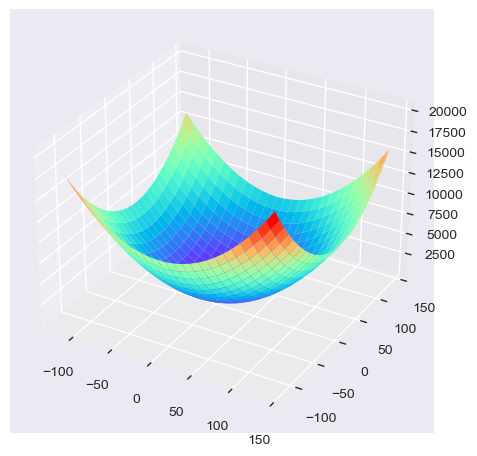

C:\Users\CSLab\AppData\Local\Temp\ipykernel_5320\1706167698.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


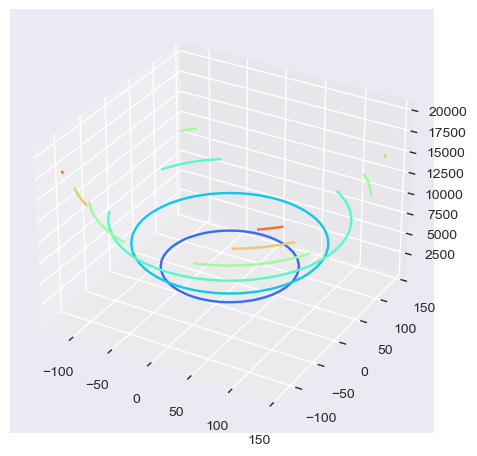

In [18]:
# Visualising the training process 
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]
        J[i,j] = np.mean((y-yp)**2)/2


fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()


In [19]:
# Trace the trajectory of gradient 
def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.array([-150,100])
    error_list = []
    # note down values of theta
    theta_list = []
    
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    return theta, theta_list, error_list


In [20]:
theta, theta_list, error_list = train(XT,yT)

In [21]:
theta_list = np.array(theta_list)

C:\Users\CSLab\AppData\Local\Temp\ipykernel_5320\1081706445.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


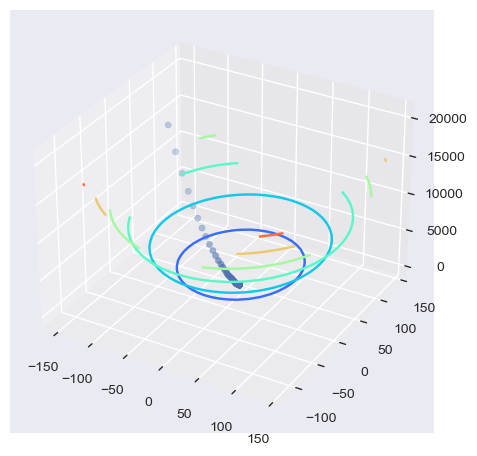

In [22]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
plt.show()

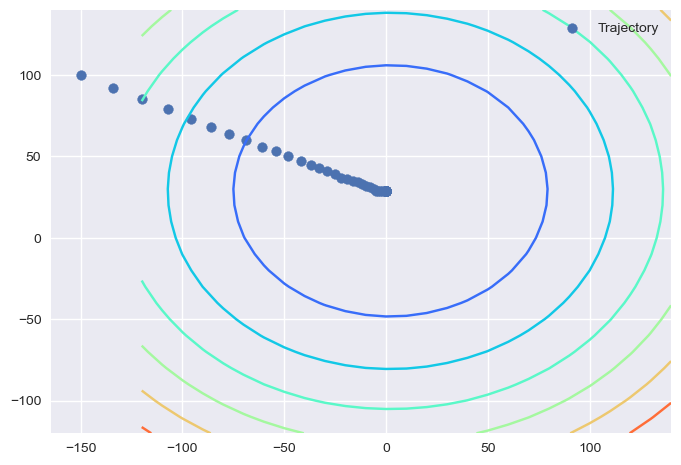

In [23]:
# 2D Contour Plot (Top View)
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],label='Trajectory')
plt.legend()
plt.show()

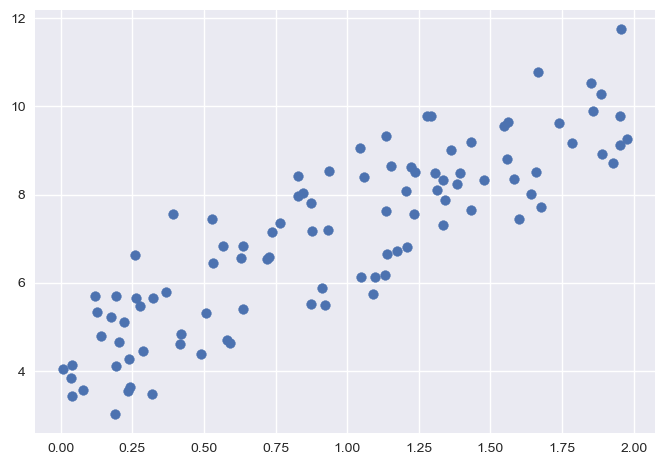

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X,y)
plt.show()

In [25]:
# Add a bias term to X (X0 = 1)
X_b = np.c_[np.ones((100, 1)), X]
#plt.scatter(X_b,y)
#plt.show()
print(X_b.shape, y.shape)

(100, 2) (100, 1)


[[-0.35399391]
 [-1.37495129]]
//////
[[1.38265175]
 [0.55601183]]
[[2.40678929]
 [1.68483811]]
[[3.01261848]
 [2.3430567 ]]
[[3.37280115]
 [2.72522722]]
[[3.58867214]
 [2.94552625]]
[[3.71970652]
 [3.07095621]]
[[3.80081302]
 [3.14083461]]
[[3.85248299]
 [3.17823168]]
[[3.88674653]
 [3.19668274]]
[[3.91066794]
 [3.20412753]]
[[3.92839712]
 [3.20522199]]
[[3.94237349]
 [3.20269506]]
[[3.95403247]
 [3.19814486]]
[[3.96422018]
 [3.19250601]]
[[3.97343675]
 [3.18632381]]
[[3.98197917]
 [3.17991523]]
[[3.99002508]
 [3.17346328]]
[[3.99768198]
 [3.16707252]]
[[4.00501611]
 [3.16080149]]
[[4.01206938]
 [3.15468187]]
[[4.01886932]
 [3.14872962]]
[[4.02543494]
 [3.1429516 ]]
[[4.03178017]
 [3.13734938]]
[[4.03791583]
 [3.13192151]]
[[4.04385086]
 [3.12666485]]
[[4.04959301]
 [3.12157535]]
[[4.05514925]
 [3.11664846]]
[[4.060526  ]
 [3.11187947]]
[[4.0657293 ]
 [3.10726357]]
[[4.07076488]
 [3.10279602]]
[[4.07563825]
 [3.09847214]]
[[4.08035466]
 [3.09428736]]
[[4.0849192 ]
 [3.09023724]]
[[4.0

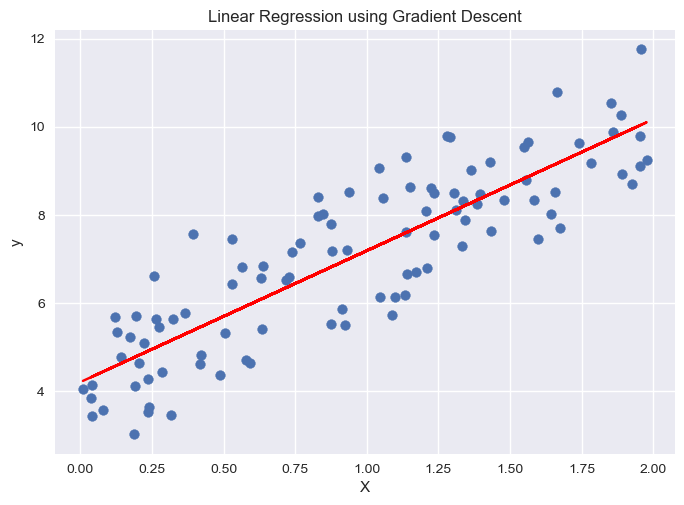

In [26]:

# Gradient Descent Parameters
eta = 0.1  # learning rate
n_iterations = 100
m = 100  # number of instances

# Initialize theta with random values
theta = np.random.randn(2, 1)
print(theta)
print("//////")
# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    print(theta)
# Final theta values (intercept and slope)
intercept, slope = theta

# Print the final parameters
print("Intercept:", intercept)
print("Slope:", slope)

# Plot the data and the linear regression line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.show()
